# Setup MMDetection3D 

This notebook show how to setup the MMDetection3D codebase adjusted for railway data, train [SMOKE](https://github.com/open-mmlab/mmdetection3d/blob/master/configs/smoke/README.md) on railway data and analyse the results.

Official MMDetection3D documentation:
*   [Website](https://mmdetection3d.readthedocs.io/en/latest/)
*   [GitHub](https://github.com/open-mmlab/mmdetection3d)



Example visualization:

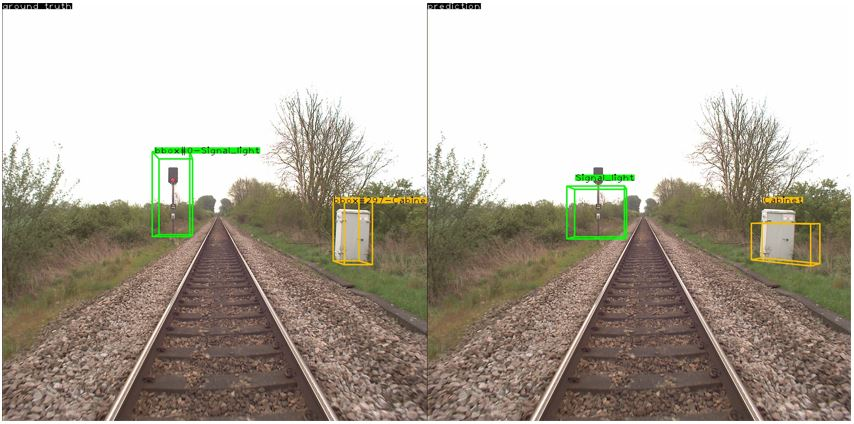

## Check NVIDIA compatibility

MMDetection3D requires CUDA and cuDNN (version 11.1 and 8.0.5 respectively at time of writing, Feb 2022) to run.

In [ ]:
!python --version
!nvidia-smi
# Check CUDA version
!nvcc --version
# Check GCC version
!gcc --version

Python 3.8.16
Tue Jan 17 10:34:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   28C    P0    41W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                          

## Install dependencies.

In [ ]:
# Following instructions: https://mmdetection3d.readthedocs.io/en/latest/getting_started.html
# install dependencies (if not already installed)
!pip install torch==1.10.0+cu111 torchvision==0.11.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# Install mmcv-full with pre-compiled wheel for faster build and such that we can use CUDA operators
!pip install mmcv-full==1.4.5 -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

# See compatible versions https://github.com/open-mmlab/mmdetection/blob/master/docs/en/get_started.md
!pip install mmdet==2.20.0

# See compatible versions https://github.com/open-mmlab/mmsegmentation/blob/master/docs/en/get_started.md
!pip install mmsegmentation==0.21.0

# For plotting graphs
!pip install seaborn==0.11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import code and dependencies

1. Import the codebase from the specified branch.

In [ ]:
!git clone https://github.com/Abundle/mmdetection3d --branch v1.0.0.dev0

Cloning into 'mmdetection3d'...
remote: Enumerating objects: 12728, done.
remote: Total 12728 (delta 0), reused 0 (delta 0), pack-reused 12728
Receiving objects: 100% (12728/12728), 15.59 MiB | 33.12 MiB/s, done.
Resolving deltas: 100% (8811/8811), done.


In [ ]:
!rm -rf '/content/mmdetection3d/data/kitti'

In [ ]:
!rm -rf '/content/mmdetection3d/work_dirs/results/plots'

2. Upload the dataset zip file to Google Drive.

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


3. Then prepare the directory, unzip and import the dataset.

In [ ]:
!mkdir data/kitti

%cd "/content/mmdetection3d/data/"

!unzip -u "/content/gdrive/MyDrive/dataset_3d_object_detection.zip" -d "/content/mmdetection3d/data/"
# return to main directory before building
%cd "/content/mmdetection3d"

Streaming output truncated to the last 5000 lines.
 extracting: /content/mmdetection3d/data/kitti/testing/velodyne/001359.bin  
 extracting: /content/mmdetection3d/data/kitti/testing/velodyne/001360.bin  
 extracting: /content/mmdetection3d/data/kitti/testing/velodyne/001361.bin  
 extracting: /content/mmdetection3d/data/kitti/testing/velodyne/001362.bin  
 extracting: /content/mmdetection3d/data/kitti/testing/velodyne/001363.bin  
 extracting: /content/mmdetection3d/data/kitti/testing/velodyne/001364.bin  
 extracting: /content/mmdetection3d/data/kitti/testing/velodyne/001365.bin  
 extracting: /content/mmdetection3d/data/kitti/testing/velodyne/001366.bin  
 extracting: /content/mmdetection3d/data/kitti/testing/velodyne/001367.bin  
 extracting: /content/mmdetection3d/data/kitti/testing/velodyne/001368.bin  
 extracting: /content/mmdetection3d/data/kitti/testing/velodyne/001369.bin  
 extracting: /content/mmdetection3d/data/kitti/testing/velodyne/001370.bin  
 extracting: /content/mmd

## Build MMDetection3D

In [ ]:
!pip install importlib-metadata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -v -e .

Using pip 22.0.4 from /usr/local/lib/python3.8/dist-packages/pip (python 3.8)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection3d
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-b289que0/mmdet3d.egg-info
  writing /tmp/pip-pip-egg-info-b289que0/mmdet3d.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-b289que0/mmdet3d.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-b289que0/mmdet3d.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-b289que0/mmdet3d.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-b289que0/mmdet3d.egg-info/SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  /usr/local/lib/python3.8/dist-packages/torch/utils/cpp_extension.py:381: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to usi

# Importing the dataset

The Data is stored under the ```data/kitti``` path in the [KITTI format](https://mmdetection3d.readthedocs.io/en/latest/datasets/kitti_det.html). The ```create_data``` script generates JSON and pickle files that bundle all the data in one file for training the model. 

The testing dataset contains many more images than train and val because it mostly consists of empty (negative) samples with no objects present. 

*Note: This only has to be done once; if these files are already created, we skip this step.*

In [ ]:
# Create pickle and coco.json files for training if not already present
!python tools/create_data.py kitti --root-path ./data/kitti --out-dir ./data/kitti --extra-tag kitti

Generate info. this may take several minutes.
[>>] 670/670, 322.6 task/s, elapsed: 2s, ETA:     0s
Kitti info train file is saved to data/kitti/kitti_infos_train.pkl
[>>] 4/4, 717.7 task/s, elapsed: 0s, ETA:     0s
Kitti info val file is saved to data/kitti/kitti_infos_val.pkl
Kitti info trainval file is saved to data/kitti/kitti_infos_trainval.pkl
Kitti info test file is saved to data/kitti/kitti_infos_test.pkl
create reduced point cloud for training set
[>>] 670/670, 1702.1 task/s, elapsed: 0s, ETA:     0s
create reduced point cloud for validation set
[>>] 4/4, 1732.8 task/s, elapsed: 0s, ETA:     0s
create reduced point cloud for testing set
[>>] 2983/2983, 1679.9 task/s, elapsed: 2s, ETA:     0s
[>>] 670/670, 19.2 task/s, elapsed: 35s, ETA:     0s
[>>] 4/4, 19.3 task/s, elapsed: 0s, ETA:     0s
[>>] 674/674, 19.2 task/s, elapsed: 35s, ETA:     0s
[>>] 2983/2983, 19.7 task/s, elapsed: 152s, ETA:     0s
Create GT Database of KittiDataset
[>>] 670/670, 481.2 task/s, elapsed: 1s, ETA: 

In [ ]:
# Check if dataset (training split) is correctly loaded
!python tools/misc/browse_dataset.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py \
  --output-dir 'work_dirs/browse_dataset/' \
  --task 'mono-det' 

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
[                                                  ] 0/656, elapsed: 0s, ETA:Traceback (most recent call last):
  File "tools/misc/browse_dataset.py", line 226, in <module>
    main()
  File "tools/misc/browse_dataset.py", line 218, in main
    is_nus_mono=(dataset_type == 'NuScenesMonoDataset'))
  File "tools/misc/browse_dataset.py", line 139, in show_proj_bbox_img
    gt_bboxes = input['gt_bboxes_3d']._data
KeyError: 'gt_bboxes_3d'


# Training

Current config requires at least 16GB VRAM. Tested on a Tesla P100 GPU.

In [ ]:
!pip install GPUtil

from GPUtil import showUtilization as gpu_usage
gpu_usage()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7409 sha256=17169ac8f6e4a5b344213d4de1c4a70f9688f6d3daf9d77c126ba8df01af82a6
  Stored in directory: /root/.cache/pip/wheels/ba/03/bb/7a97840eb54479b328672e15a536e49dc60da200fb21564d53
Successfully built GPUtil
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from numba import cuda
cuda.select_device(0)
cuda.close()
cuda.select_device(0)

<weakproxy at 0x7f5a865c1090 to Device at 0x7f5a818ba8b0>

In [ ]:
# March 1 run - 72 epochs (same as original SMOKE model)
!python tools/train.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py

/content/mmdetection3d/mmdet3d/utils/setup_env.py:32: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warnings.warn(
/content/mmdetection3d/mmdet3d/utils/setup_env.py:42: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warnings.warn(
2023-01-16 23:24:44,285 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.8.16 (default, Dec  7 2022, 01:12:13) [GCC 7.5.0]
CUDA available: True
GPU 0: A100-SXM4-40GB
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.2.r11.2/compiler.29618528_0
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.10.0+cu111
PyTorch compiling details: Py

In [ ]:
# Feb 21 run - 25 epochs
!python tools/train.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py

/content/mmdetection3d/mmdet3d/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmdetection3d/mmdet3d/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-11-09 16:58:41,292 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.15 (default, Oct 12 2022, 19:14:55) [GCC 7.5.0]
CUDA available: True
GPU 0: A100-SXM4-40GB
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.2.r11.2/compiler.29618

# Results

Below we analyse the results of the training process. 

## Testing and evaluation

The results of the model are tested using 2 evaluation methods; KITTI and NuScenes. Since the dataset is in KITTI format, these evaluation methods are automatically run. However, KITTI dataset was created from an automotive perspective, so the evaluation method is not entirely suited for rail applications. The NuScenes evaluation is more generalised, giving us a more objective overview of the accuracy of the model. Namely for every class of bounding boxes, it computes the following errors:

*   **AP** (Average Precision)
*   **ATE** (Average Translation Error) in meters
*   **ASE** (Average Scale Error) in 1-IOU (Intersection Over Union)
*   **AOE** (Average Orientation Error) in radians

The code was adjusted to handle NuScenes evaluation on a KITTI dataset format. Plots are saved in the ```work_dirs/results/plots``` directory. 


Test the model on the validation and testing set:

In [ ]:
# 1 March run - 72 epochs. Tested on validaton split (default behavior, change in smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py file).
!python tools/test.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py \
  work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/epoch_72.pth \
  --out work_dirs/results/mmdet3d_pred_results_val.pkl \
  --eval 'mAP' \
  --eval-options 'pklfile_prefix=data/kitti/training/pred/pred_railway_' 'out_dir=work_dirs/results/'

/content/mmdetection3d/mmdet3d/utils/setup_env.py:32: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warnings.warn(
/content/mmdetection3d/mmdet3d/utils/setup_env.py:42: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warnings.warn(
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load checkpoint from local path: work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/epoch_72.pth
2023-01-17 01:30:59,766 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_0.projs.0.conv is upgraded to version 2.
2023-01-17 01:30:59,767 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_0.nodes.0.c

In [ ]:
# 1 March run - 72 epochs. Tested on test split.
!python tools/test.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py \
  work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/epoch_72.pth \
  --out work_dirs/results/mmdet3d_pred_results_test.pkl \
  --eval 'mAP' \
  --eval-options 'pklfile_prefix=data/kitti/testing/pred/pred_railway_' 'out_dir=work_dirs/results/'

/content/mmdetection3d/mmdet3d/utils/setup_env.py:32: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warnings.warn(
/content/mmdetection3d/mmdet3d/utils/setup_env.py:42: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warnings.warn(
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
load checkpoint from local path: work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/epoch_72.pth
2023-01-17 01:32:16,718 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_0.projs.0.conv is upgraded to version 2.
2023-01-17 01:32:16,719 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_0.nodes.0.c

In [ ]:
# 21 Feb run - 25 epochs. Tested on validation split.
!python tools/test.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py \
  work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/epoch_25.pth \
  --out work_dirs/results/mmdet3d_pred_results_test.pkl \
  --eval 'mAP' \
  --eval-options 'pklfile_prefix=data/kitti/training/pred/pred_railway_' 'out_dir=work_dirs/results/'

/content/mmdetection3d/mmdet3d/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmdetection3d/mmdet3d/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
load checkpoint from local path: work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/epoch_25.pth
2022-10-17 18:01:30,193 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_0.projs.0.conv is upgraded to 

## Log analysis

plot curve of work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/20230116_232444.log.json, metric is loss_cls
plot curve of work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/20230116_232444.log.json, metric is loss_bbox


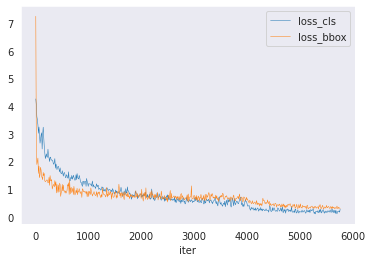

In [ ]:
# 1 March run - 72 epochs
%run tools/analysis_tools/analyze_logs.py plot_curve \
  work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/20230116_232444.log.json \
  --keys loss_cls loss_bbox \
  --legend loss_cls loss_bbox 

# To skip plotting and save directly to directory, add
  # \ --out work_dirs/results/losses.pdf

plot curve of work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/20221017_163639.log.json, metric is loss_cls
plot curve of work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/20221017_163639.log.json, metric is loss_bbox


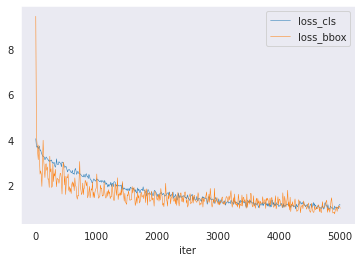

In [ ]:
# 21 Feb run - 25 epochs
%run tools/analysis_tools/analyze_logs.py plot_curve \
  work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/20221017_163639.log.json \
  --keys loss_cls loss_bbox \
  --legend loss_cls loss_bbox

# To skip plotting and save directly to directory, add
  # -\ -out work_dirs/results/losses.pdf

In [ ]:
!python tools/misc/visualize_results.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py \
  --result work_dirs/results/mmdet3d_pred_results_test.pkl \
  --show-dir work_dirs/results/ 

Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.7/dist-packages/mmdet/datasets/builder.py", line 10, in <module>
    from mmcv.runner import get_dist_info
  File "/usr/local/lib/python3.7/dist-packages/mmcv/runner/__init__.py", line 4, in <module>
    from .builder import RUNNERS, build_runner
  File "/usr/local/lib/python3.7/dist-packages/mmcv/runner/builder.py", line 7, in <module>
    RUNNER_BUILDERS = Registry('runner builder')
  File "/usr/local/lib/python3.7/dist-packages/mmcv/utils/registry.py", line 93, in __init__
    self._scope = self.infer_scope() if scope is None else scope
  File "/usr/local/lib/python3.7/dist-packages/mmcv/utils/registry.py", line 144, in infer_scope
    filename = inspect.getmodule(inspect.stack()[2][0]).__name__
  Fil

In [ ]:
!zip -r /content/plots.zip /content/mmdetection3d/work_dirs/results/plots

  adding: content/mmdetection3d/work_dirs/results/plots/ (stored 0%)
  adding: content/mmdetection3d/work_dirs/results/plots/dist_pr_0.5.pdf (deflated 29%)
  adding: content/mmdetection3d/work_dirs/results/plots/Marker_pr.pdf (deflated 29%)
  adding: content/mmdetection3d/work_dirs/results/plots/dist_pr_4.0.pdf (deflated 28%)
  adding: content/mmdetection3d/work_dirs/results/plots/Signal_light_tp.pdf (deflated 32%)
  adding: content/mmdetection3d/work_dirs/results/plots/Cabinet_tp.pdf (deflated 30%)
  adding: content/mmdetection3d/work_dirs/results/plots/summary.pdf (deflated 21%)
  adding: content/mmdetection3d/work_dirs/results/plots/Cabinet_pr.pdf (deflated 28%)
  adding: content/mmdetection3d/work_dirs/results/plots/Marker_tp.pdf (deflated 30%)
  adding: content/mmdetection3d/work_dirs/results/plots/dist_pr_2.0.pdf (deflated 28%)
  adding: content/mmdetection3d/work_dirs/results/plots/dist_pr_1.0.pdf (deflated 28%)
  adding: content/mmdetection3d/work_dirs/results/plots/Signal_ligh

In [ ]:
from google.colab import files
files.download("/content/plots.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Benchmarking

Benchmark the inference speed of the model.

In [ ]:
!python tools/analysis_tools/benchmark.py configs/smoke/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway.py \
  \work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/latest.pth \
  --fuse-conv-bn

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load checkpoint from local path: work_dirs/smoke_dla34_pytorch_dlaneck_gn-all_1x1_6x_kitti-mono3d-railway/latest.pth
2022-09-26 12:22:51,345 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_0.projs.0.conv is upgraded to version 2.
2022-09-26 12:22:51,347 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_0.nodes.0.conv is upgraded to version 2.
2022-09-26 12:22:51,348 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_1.projs.0.conv is upgraded to version 2.
2022-09-26 12:22:51,348 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_1.projs.1.conv is upgraded to version 2.
2022-09-26 12:22:51,349 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_1.nodes.0.conv is upgraded to version 2.
2022-09-26 12:22:51,350 - root - INFO - ModulatedDeformConvPack neck.dla_up.ida_1.nodes.1.conv is upgraded to version 2.
2022-09-26 12:22:51,350 - root - INFO - ModulatedDeformConvPack neck.dla_u